**Question 4 (16 points)**

Note: Please submit the Google Colab or Jupyter Notebook for this question.

Load the titanic dataset using seaborn given the code below and answer the questions
below:

```python3
import seaborn as sns
df = sns.load_dataset(‘titanic’)
```

Study the dataset and the goal here: https://www.kaggle.com/competitions/titanic.
You can use seaborn or matplotlib or both.

In [17]:
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

df = sns.load_dataset("titanic")

1. Using a charting tool of your choice (bar or box or factor plots), show how port of embarkation and survivorship relate to fare in one plot! (use survived as color/hue)

    Write about queenstown and cherbourg fare rates, do you see any difference on an average for those who survived/not survived? (4 points)


In [2]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='survived', ylabel='fare'>

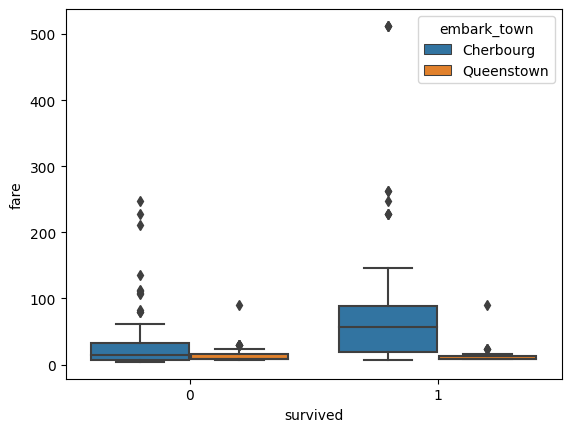

In [15]:
# select out embark town with only in Cherbourg and Queenstown
df2 = df[df["embark_town"].isin(["Cherbourg","Queenstown"])]

# plot a multivariate box plot chart
sns.boxplot(x="survived", y="fare", hue="embark_town", data=df2)

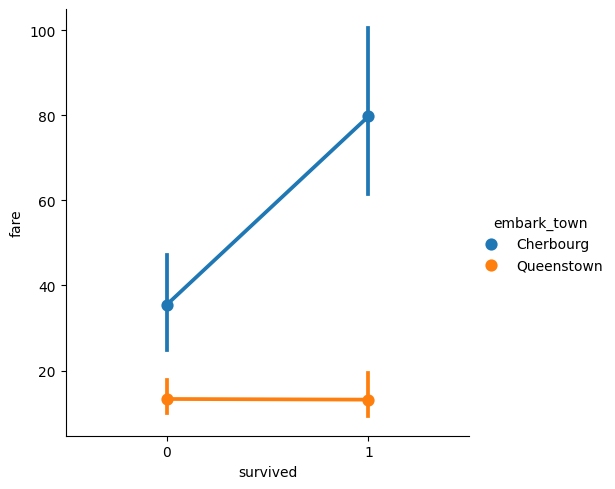

In [16]:
sns.factorplot(x="survived", y="fare", hue="embark_town", data=df2)


2.	Correlate numerical variables (Age, Fare) and Discrete Variables (treat sibsp and parch as discrete variables) with survival (create variables survived and not survived) and show via a heatmap. Which two variables have the strongest relationship? Which variable has the strongest variable with those who survived? (4 points)

In [23]:
import pandas
df3 = pandas.get_dummies(df,columns=["survived"])
df3.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,survived_0,survived_1
0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1,0
1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0,1
2,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0,1
3,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0,1
4,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,1,0
887,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,0,1
888,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,1,0
889,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,0,1


<Axes: >

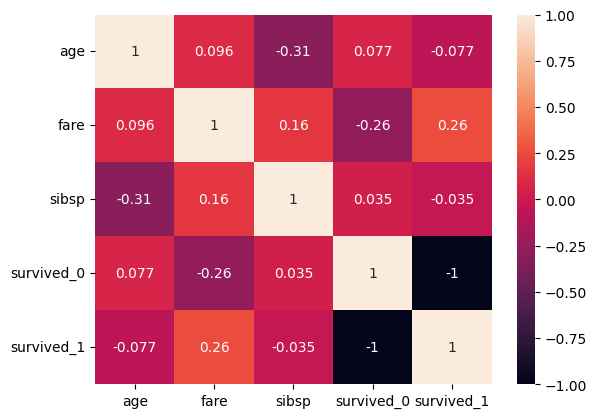

In [25]:
sns.heatmap(df3[["age","fare","sibsp","survived_0","survived_1"]].corr(), annot=True, fmt="1.2g")

3.	Create a pivot table using Survival and Sex on the index, port of embarkation on the columns and Average Fare and Counts as the metric/aggregation function, fill any missing values with 0’s.

    What is the highest and lowest average fare in the table for those who survived and for those who didn’t survive? Jot down if that person was a male or female and which port that person embarked from for each.

    (8 points)


In [37]:
df.pivot_table(index=["survived","sex"], 
               columns=["embark_town"],
               aggfunc={"fare": [len, numpy.mean],
                        }
               )

fare                                               \
                      len                              mean              
embark_town     Cherbourg Queenstown Southampton  Cherbourg Queenstown   
survived sex                                                             
0        female         9          9          63  16.215278  10.904633   
         male          66         38         364  38.065342  13.911732   
1        female        64         27         140  83.460286  13.211733   
         male          29          3          77  71.468545  12.916667   

                             
                             
embark_town     Southampton  
survived sex                 
0        female   25.728508  
         male     19.881281  
1        female   44.596518  
         male     30.366286